In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Activation,Conv2D,Dense,MaxPool2D,Dropout,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
import matplotlib.pyplot as plt
import datetime

#pip install opencv-python


In [2]:
Training_path = './Training'
test_path = './Test'
input_shape = (254,254,3)
batch = 64

In [3]:
import os
for dirname, _, filenames in os.walk(Training_path):
    for filename in filenames:
        (os.path.join(dirname, filename))
labels = os.listdir(Training_path)
print(labels)

['Fire', 'No_Fire']



 FIRE


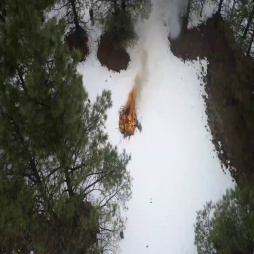

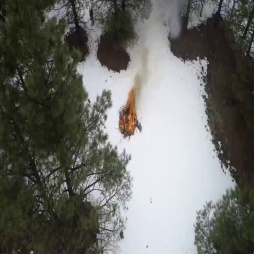

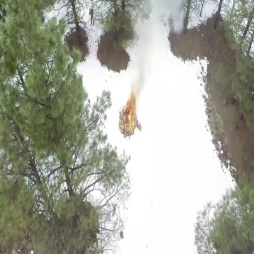

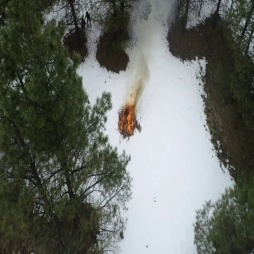

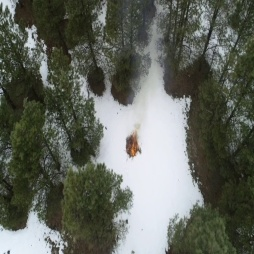

there are  25018  images in  Fire class

 NO_FIRE


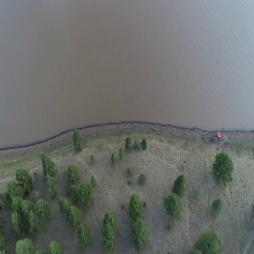

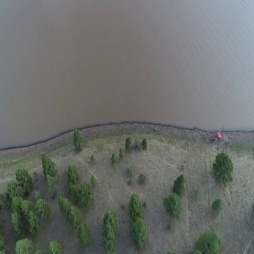

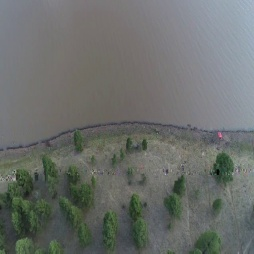

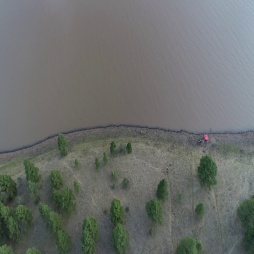

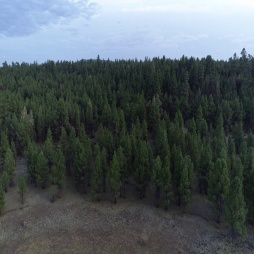

there are  14357  images in  No_Fire class


In [4]:
from IPython.display import Image, display
num = []
for label in labels:
    path = './{0}/{1}/'.format(Training_path,label)
    folder_data = os.listdir(path)
    k = 0
    print('\n', label.upper())
    for image_path in folder_data:
        if k < 5:
            display(Image(path+image_path))
        k = k+1
    num.append(k)
    print('there are ', k,' images in ', label, 'class')

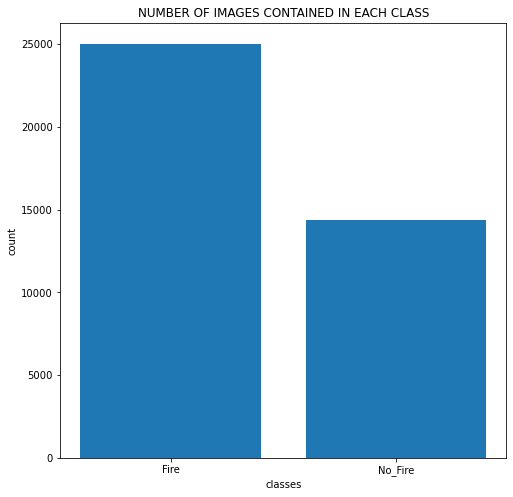

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
plt.bar(labels, num)
plt.title('NUMBER OF IMAGES CONTAINED IN EACH CLASS')
plt.xlabel('classes')
plt.ylabel('count')
plt.show()

In [6]:
train_images = ImageDataGenerator(rotation_range=40,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     rescale=1.0/255,
                                     zoom_range=0.6,
                                     fill_mode='nearest',
                                     validation_split=0.2)

train_generator = train_images.flow_from_directory(Training_path, 
                                                   target_size=(254,254),
                                                   color_mode='rgb',
                                                   class_mode='binary',
                                                   batch_size=batch,
                                                   shuffle=True,
                                                   subset='training')

validation_generator = train_images.flow_from_directory(Training_path, 
                                                        target_size=(254,254),
                                                        color_mode='rgb',
                                                        class_mode='binary',
                                                        batch_size=batch,
                                                        shuffle=True,
                                                        subset='validation')

Found 31501 images belonging to 2 classes.
Found 7874 images belonging to 2 classes.


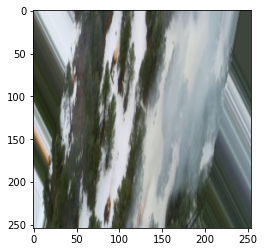

In [7]:
sample = train_generator.next();
plt.imshow(sample[0][0])
train_generator.reset()

In [8]:
test_images = ImageDataGenerator(rescale=1.0/255)

test_generator = test_images.flow_from_directory(test_path, 
                                                    target_size=(254,254), 
                                                    color_mode='rgb', 
                                                    class_mode='binary',
                                                    shuffle=False,
                                                    batch_size=batch)


Found 8617 images belonging to 2 classes.


In [12]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
#model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 252, 252, 64)      1792      
_________________________________________________________________
activation_18 (Activation)   (None, 252, 252, 64)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 124, 124, 32)      18464     
_________________________________________________________________
activation_19 (Activation)   (None, 124, 124, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 16)       

In [13]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples  // batch,
                    epochs=10,
                    validation_data = validation_generator, 
                    validation_steps = validation_generator.samples // batch,
                    callbacks=[es, rlr, mcp, tb],
                    verbose=1
    )
model.save('./ver3.h5')

Epoch 1/10
  1/492 [..............................] - ETA: 0s - loss: 0.6951 - accuracy: 0.4688WARNING:tensorflow:From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
492/492 [==============================] - ETA: 0s - loss: 0.3908 - accuracy: 0.8572 
Epoch 00001: val_loss improved from inf to 0.05285, saving model to weights.h5
492/492 [==============================] - 5812s 12s/step - loss: 0.3908 - accuracy: 0.8572 - val_loss: 0.0528 - val_accuracy: 0.9977
Epoch 2/10
492/492 [==============================] - ETA: 0s - loss: 0.2140 - accuracy: 0.9232
Epoch 00002: val_loss did not improve from 0.05285
492/492 [==============================] - 4491s 9s/step - loss: 0.2140 - accuracy: 0.9232 - val_loss: 0.2311 - val_accuracy: 0.8462
Epoch 3/10
492/492 [========================

In [15]:
reconstructed_model = load_model('./ver3.h5')

In [16]:
reconstructed_model.evaluate(test_generator)

135/135 [==============================] - 323s 2s/step - loss: 14.7404 - accuracy: 0.5458


[14.740368843078613, 0.5457816123962402]

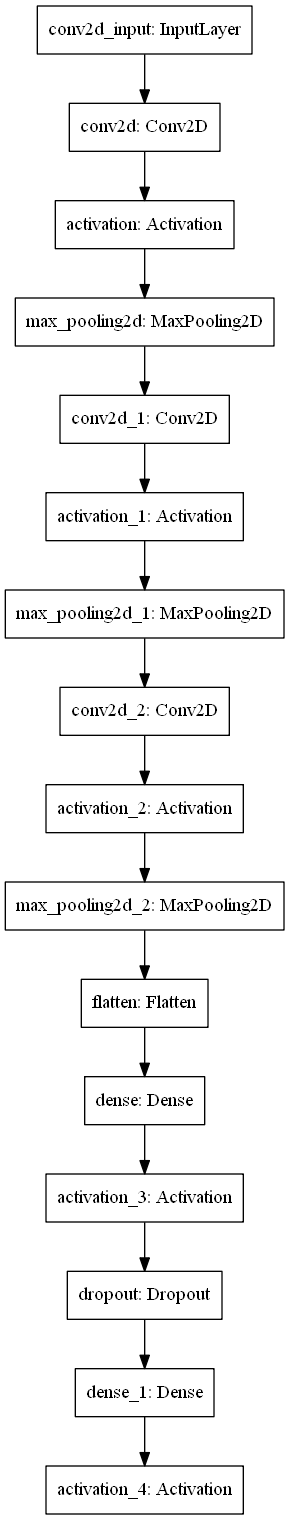

In [15]:
tf.keras.utils.plot_model(
    reconstructed_model,
    to_file="model.png",
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [64]:
from sklearn.metrics import accuracy_score
print('the accuracy obtained on the test set is:', accuracy_score(y,test_generator))

ValueError: Found input variables with inconsistent numbers of samples: [8617, 135]

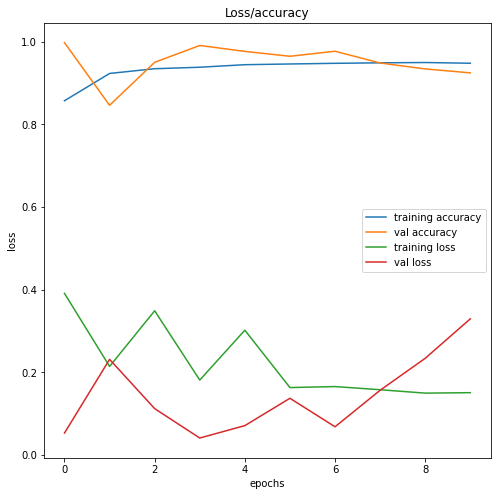

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model.save('./models/ver1.h5')

In [ ]:
model.evaluate_generator(test_generator)

In [ ]:
model1 = tf.keras.models.load_model('./models/ver1.h5')

In [ ]:
model1.evaluate(test_generator)

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
plot_model(model1)